### Exercise

Complete the TODO part in the provided [exercise.cpp](./exercise.cpp) code, as in the following snippet. In the next sections of this notebook you can find an example visualisation script & compilation instructions, for gcc and clang, with the expected results.

```c++
  int main(int argc, char *argv[]) {
  // Parse CLI parameters
  parameters p(argc, argv);
  
  // Initialize MPI with multi-threading support
  // Declare an integer variable to hold the threading support level
  int mt;
  
  // TODO: Initialize the MPI environment with support for multi-threading.
  
  
  // TODO: Check the level of thread support
  
  
    // Get the total number of processes (ranks) in the communicator MPI_COMM_WORLD.
  // This value is stored in 'p.nranks', which will be used to determine how many processes are participating.
  MPI_Comm_size(MPI_COMM_WORLD, &p.nranks);

```

## Visualize Function

You can rely on this python function to plot the result; mind that numpy and matplotlib should be installed first. You can either copy and paste it in a script.py and run it with python, or use the notebook.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
#plt.style.use('default') #for light background
def visualize(name = 'output'):
    f = open(name, 'rb')
    grid = np.fromfile(f, dtype=np.uint64, count=2, offset=0)

    nx = grid[0]
    ny = grid[1]

    times = np.fromfile(f, dtype=np.float64, count=1, offset=0)
    time = times[0]

    values = np.fromfile(f, dtype=np.float64, offset=0)
    assert len(values) == nx * ny, f'{len(values)} != {nx * ny}'
    values = values.reshape((nx, ny))

    print(f'Plotting grid {nx}x{ny}, t = {time}')

    plt.title(f'Temperature at t = {time:.3f} [s]')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.pcolormesh(values, cmap=plt.cm.jet, vmin=0, vmax=values.max())
    plt.colorbar()
    plt.savefig('output.png', transparent=True, bbox_inches='tight', dpi=300)

---

## Compile and Run Commands

Before compiling, check that you are using a recent enough version of g++. In case you are not, you can follow the previous lab instructions to install it via spack (and/or in a container). Similar instructions follows for clang++ too; same considerations apply.
The following instructions compile the solution file; substitute solution.cpp with exercise.cpp to check your work.

g++ (GCC) 15.1.1 20250425
Copyright (C) 2025 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

E(t=0) = 0.000775146
E(t=0.00305176) = 0.0563158
E(t=0.00610352) = 0.0781322
E(t=0.00915527) = 0.0939739
E(t=0.012207) = 0.106721
E(t=0.0152588) = 0.11749
E(t=0.0183105) = 0.126854
E(t=0.0213623) = 0.135153
E(t=0.0244141) = 0.142608
E(t=0.0274658) = 0.149375
E(t=0.0305176) = 0.155564
E(t=0.0335693) = 0.161261
E(t=0.0366211) = 0.166532
E(t=0.0396729) = 0.17143
E(t=0.0427246) = 0.175996
E(t=0.0457764) = 0.180266
Rank 0: local domain 256x256 (0.00104858 GB): 2.27457 GB/s
All ranks: global domain 512x256 (0.00209715 GB): 4.54914 GB/s
Plotting grid 512x256, t = 0.048828125


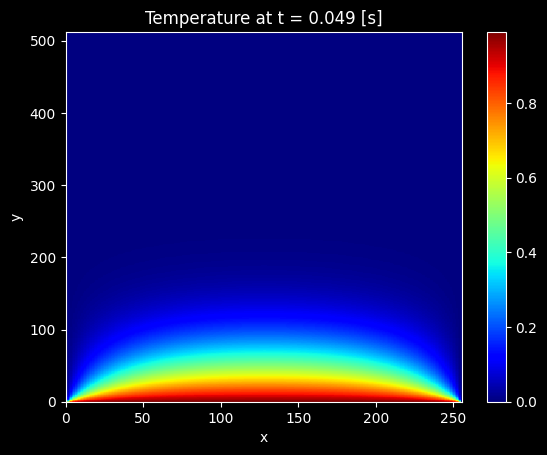

In [2]:
!rm -rf output
!rm -rf solution
!mpicxx --version
!mpicxx -std=c++23 -Ofast -march=native -o solution solution.cpp -ltbb
!mpirun -np 2 ./solution 256 256 16000
visualize()

E(t=0) = 0.000775146
E(t=0.00305176) = 0.0563158
E(t=0.00610352) = 0.0781322
E(t=0.00915527) = 0.0939739
E(t=0.012207) = 0.106721
E(t=0.0152588) = 0.11749
E(t=0.0183105) = 0.126854
E(t=0.0213623) = 0.135153
E(t=0.0244141) = 0.142608
E(t=0.0274658) = 0.149375
E(t=0.0305176) = 0.155564
E(t=0.0335693) = 0.161261
E(t=0.0366211) = 0.166532
E(t=0.0396729) = 0.17143
E(t=0.0427246) = 0.175996
E(t=0.0457764) = 0.180266
Rank 0: local domain 256x256 (0.00104858 GB): 1.68176 GB/s
All ranks: global domain 1536x256 (0.00629146 GB): 10.0905 GB/s
Plotting grid 1536x256, t = 0.048828125


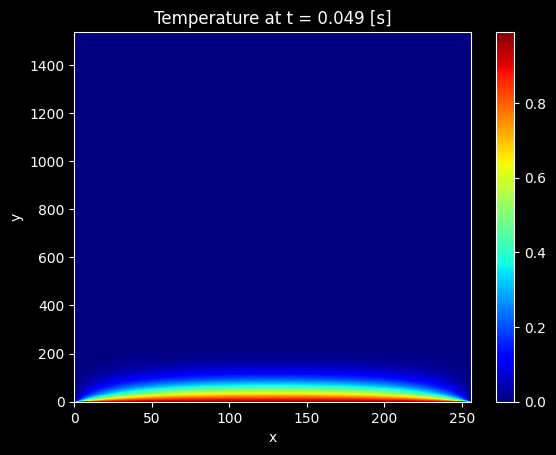

In [3]:
!rm -rf output
!rm -rf solution
!OMPI_CXX=clang++ mpicxx -std=c++23 -O3 -ffast-math -march=native -o solution solution.cpp -ltbb
!mpirun -np 6 ./solution 256 256 16000
visualize()